<a href="https://colab.research.google.com/github/shubhamkoshti71/707-week1-assignment1-bank-loan-data/blob/main/assignment1_ShubhamK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
# Place all code in this notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [114]:
df = pd.read_csv("/bank-full.csv", sep=";")

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  int64 
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(9), object(8)
memory usage: 5.9+ MB


In [115]:
df.describe(include= 'object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [116]:
df['y'].replace(['yes', 'no'], [1,0], inplace = True)
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

* Finding percentage of subscribed and unsubscribed term deposits compared to overall data

In [117]:
count_sub = len(df[df['y']==1])
count_no_sub = len(df[df['y']== 0])
per_sub = count_sub/ (count_sub+count_no_sub)
per_un_sub = count_no_sub/ (count_sub+count_no_sub)
print("Percentage of customers who bought the term deposit:", per_sub*100)
print("Percentage of customers who didn't purchase the term deposit:", per_un_sub*100)

Percentage of customers who bought the term deposit: 11.698480458295547
Percentage of customers who didn't purchase the term deposit: 88.30151954170445


In [118]:
df.groupby('y').mean()

<ipython-input-118-e1dafff4daf8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('y').mean()


,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
0,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
1,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


* We can observe that customers who bought the term deposit are older
than those who didn't buy the TD.
* Also, the mean call duration is higher for customers which subscribed to the TD.


In [119]:
df.groupby('job').mean()

<ipython-input-119-bb859882ed41>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('job').mean()


,age,balance,day,duration,campaign,pdays,previous,y
job,,,,,,,,
admin.,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630,0.122027
blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138,0.072750
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144,0.082717
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774,0.087903
management,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006,0.137556
retired,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693,0.227915
self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615,0.118429
services,38.740250,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204,0.088830
student,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092,0.286780


#Visualizations of different variables

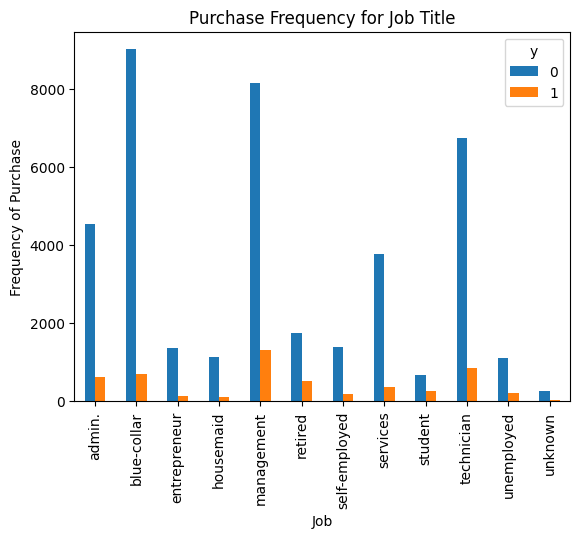

In [120]:
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

* We can say that job is a good predictor of the 'y' variable.

<Axes: xlabel='age', ylabel='Count'>

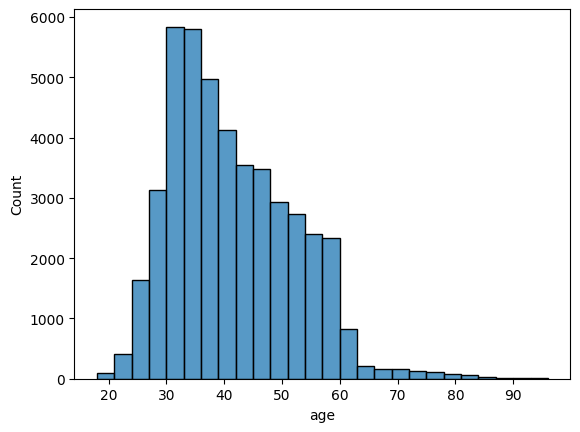

In [121]:
sns.histplot(data=df, x = 'age', binwidth=3)

* It is clear that most of the customers from dataset lie within the age range of 20-60 years.

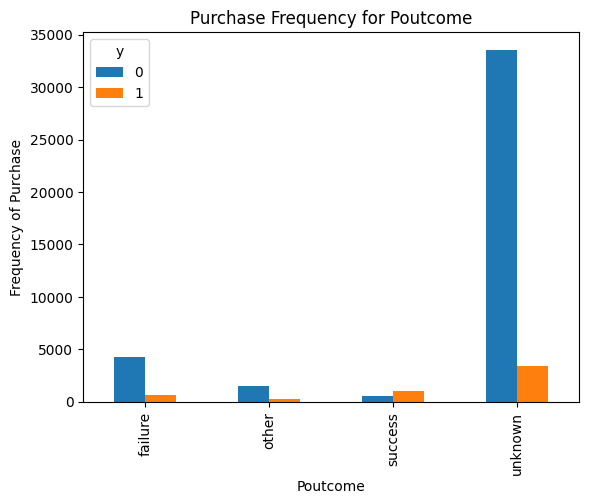

In [122]:
pd.crosstab(df.poutcome,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

* Poutcome appears to be a good predictor of 'y'.

# Creating dummy variables

In [123]:
df_dummy = pd.get_dummies(data=df, columns=['job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], dtype= int)

In [124]:
df_merged = pd.merge(df, df_dummy, how="right")

In [133]:
df_final = df_merged.drop(['job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], axis= 1)

In [134]:
#Final dataset columns displayed after creating dummy vars
df_final.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

In [142]:
#Displaying the top 10 variables having high correlation with the variable 'y'
df_vars = df_final[df_final.columns[:]].corr()['y'].sort_values(ascending=False)[2:11]
print(df_vars)
df_final_vars = list(df_vars.keys())


poutcome_success    0.306790
housing_no          0.139150
contact_cellular    0.135874
month_mar           0.129457
month_oct           0.128533
month_sep           0.123187
pdays               0.103627
previous            0.093239
job_retired         0.079249
Name: y, dtype: float64


* Selecting the top 10 variables having high correlation with 'y' excluding the 'duration' variable

In [145]:
from sklearn.model_selection import train_test_split

X = df_final[df_final_vars]
y = df_final['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a logistic regression model
logistic_regressor = LogisticRegression()
# Fit the model to the training data
logistic_regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [146]:
y_pred = logistic_regressor.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      7936
           1       0.67      0.17      0.27      1107

    accuracy                           0.89      9043
   macro avg       0.78      0.58      0.60      9043
weighted avg       0.87      0.89      0.86      9043



# K-means Clustering
Here, the data will be analyzed using K-means clustering. We will try to visualize the clusters for customer segmentation and study the influence of variables on the target variable.

## Exploratory Data Analysis

In [135]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45213 entries, 0 to 45212
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45213 non-null  int64
 1   balance              45213 non-null  int64
 2   day                  45213 non-null  int64
 3   duration             45213 non-null  int64
 4   campaign             45213 non-null  int64
 5   pdays                45213 non-null  int64
 6   previous             45213 non-null  int64
 7   y                    45213 non-null  int64
 8   job_admin.           45213 non-null  int64
 9   job_blue-collar      45213 non-null  int64
 10  job_entrepreneur     45213 non-null  int64
 11  job_housemaid        45213 non-null  int64
 12  job_management       45213 non-null  int64
 13  job_retired          45213 non-null  int64
 14  job_self-employed    45213 non-null  int64
 15  job_services         45213 non-null  int64
 16  job_student          4

In [131]:
len(df_final['job'].unique())

12

In [132]:
df_final['loan'].unique()

array(['no', 'yes'], dtype=object)

In [136]:
X = df
y = df['job']

In [137]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['job'] = le.fit_transform(X['job'])

y = le.transform(y)

In [138]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  int64 
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(9), object(8)
memory usage: 5.9+ MB


In [139]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,9,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,2,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,1,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,11,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
